<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/quick_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1.0 Import libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from pathlib import Path

In [ ]:
# 1.1 Connect gdrive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# 1.2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# 1.3 Path to data folder in gdriev:

pathToFolder = Path("/gdrive/MyDrive/Colab_data_files/product_testing/")

In [ ]:
# 2.0 Read data file:

df = pd.read_csv(pathToFolder / "train.csv.zip")
df.head()

In [ ]:
# 2.0.1 Columns
df.shape
df.columns

Index(['id', 'product_code', 'loading', 'attribute_0', 'attribute_1',
       'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1',
       'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17',
       'failure'],
      dtype='object')

In [ ]:
# 2.1 Drop 'id' and store target
#     in another variable:

_=df.pop("id")
target = df.pop('failure')

In [ ]:
# 2.2 Drop categorical columns:

df = df.drop(columns = ['product_code','attribute_0', 'attribute_1' ])
df.head()
df.shape

In [ ]:
# 3.0 Scale numeric features:

ss= StandardScaler()
df.iloc[:] = ss.fit_transform(df)


In [ ]:
# 3.1
df.head()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,-1.222832,1.525966,-1.538285,-0.101025,-0.055370,-0.681939,0.248179,0.789117,-1.384796,1.788466,...,1.120680,-0.759395,-0.184011,-1.037699,2.344516,-0.540071,NaN,-1.266177,-1.039690,0.509571
1,-1.100103,1.525966,-1.538285,1.599402,-1.246039,-0.984141,0.420975,-0.192746,0.591328,0.383792,...,-1.126062,1.018175,1.301105,-0.826619,0.035287,-0.797164,-0.417888,-0.387656,-0.485533,-0.155814
2,-1.163133,1.525966,-1.538285,1.113565,-1.722306,-0.379737,0.265159,-0.080304,-0.391214,0.732199,...,-0.730453,1.285411,-0.363249,NaN,1.407525,0.915923,1.731060,-0.581950,0.869140,-0.307320
3,-0.685543,1.525966,-1.538285,1.356484,-1.484172,-0.077535,-0.495942,-0.546137,1.453436,0.831601,...,0.034986,1.041195,0.162374,-0.522823,-1.130075,-0.348767,-0.326058,0.747773,0.416217,1.013879
4,1.543297,1.525966,-1.538285,0.384811,-1.484172,0.526868,1.552639,1.222823,-0.138302,-1.771917,...,-0.923795,-1.094691,0.685863,0.499696,0.487326,0.458003,-2.204209,-1.189363,-0.028514,-0.984448


In [ ]:
# 3.2 95% PCA of numeric features
pca = PCA(n_components = 0.95)
k = pca.fit_transform(df)

In [ ]:
# 3.2 Impute null values:

si = SimpleImputer(strategy = 'median')
df.iloc[:,:]= si.fit_transform(df)

In [ ]:
# 3.2.1 Check:
df.isnull().sum().sum()

0

In [ ]:
# 4.0 PCA now
pca = PCA(n_components = 0.95)
k = pca.fit_transform(df)

In [ ]:
# 4.1
k.shape

(26570, 19)

In [ ]:
# 4.2
pca.explained_variance_

array([2.16102821, 1.69930049, 1.16415541, 1.09027906, 1.02612856,
       1.00315619, 0.9944671 , 0.98748065, 0.97805585, 0.97261848,
       0.96335298, 0.95509186, 0.9493565 , 0.91030699, 0.86354433,
       0.788326  , 0.7729046 , 0.71593101, 0.66466463])

In [ ]:
# 4.3
np.sum(pca.explained_variance_ratio_)

0.9714447999761037

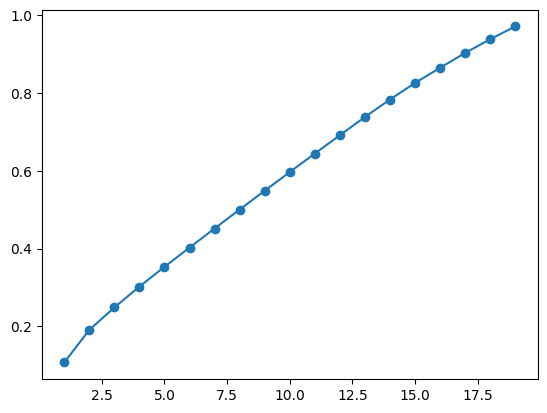

In [ ]:
# 4.4
plt.plot(range(1,20), np.cumsum(pca.explained_variance_ratio_), marker = "o" )

In [ ]:
############## DONE ################3